Práctica # 1 de SIM 2022 Q2 \\
Author: Paula Bonomini \\
pbonomini@fi.uba.ar

##  **Salida de un sistema LTI**


## Tenemos el siguiente sistema LTI, cuya entrada X $\in$ ESA:

$ Y(n) = \dfrac{X(n)+X(n-1)}{2} $

donde $X$ es ruido blanco de media $\mu_X = 0$ y covarianza $\sigma_{X}^{2}$. Sabemos que $X$ es ESA:





## 1. Determine si $Y(n)$ es ESA también.

Para que $Y(n)$ sea ESA se debe cumplir lo siguiente: \
$\mu_Y(n) = \mu_Y\: \forall n$
\
$r_Y(n-k,n)=r_Y(k)\:\forall n$.

Calculando cada condición:

$\mathbb{E}[Y(n)] = \mathbb{E}\left[\frac{X(n)+X(n-1)}{2}\right] = \frac{\mathbb{E}[X(n)]+\mathbb{E}[X(n-1)]}{2} = \frac{\mu_X+\mu_X}{2} = 0\:\:\forall n$

\
\
$\mathbb{E}[Y(n)\cdot Y^*(n-k)] = \mathbb{E}\left[\left( \frac{X(n) + X(n-1)}{2} \right) \cdot \left( \frac{X(n-k)+X(n-k-1)}{2} \right)^*\right] = \frac{1}{4}\left(\mathbb{E}[X(n) X(n-k)] + \mathbb{E}[X(n-1) X(n-k)] + \mathbb{E}[X(n) X(n-1-k)] + \mathbb{E}[X(n-k) X(n-k-1)]\right) = \frac{1}{4}(r_X(k) + r_X(k-1) + r_X(k+1) + r_X(k)) = r_Y(n-k,n) = r_Y(k) = \frac{1}{4}(r_X(k-1) + 2r_X(k) + r_X(k+1)) \:\:\forall n$

Queda así demostrado que $Y(n)$ es ESA.

## 2. Determine $S_y(\omega)$ de manera analítica.

La Densidad Espectral de Potencia $S_y(\omega)$ se define  como el espectro de la señal de autocorrelación: $S_y(\omega) = 𝔉\{r_Y(k)\}$ 

$S_y(\omega) = 𝔉\{r_Y(k)\} = 𝔉\{\frac{1}{4}(r_X(k-1) + 2r_X(k) + r_X(k+1))\} = \frac{1}{4}\left(e^{-j\omega} + 2 + e^{j\omega}\right)\cdot𝔉\{r_X(k)\} = \frac{1}{2}\left(1 + cos(\omega)\right)\sigma_X^2=cos^2(\frac{\omega}{2})\sigma_X^2$


## 3. Estime el periodograma de $Y(n)$

\begin{equation}
\widehat{S}_Y(e^{j \omega}) = \dfrac{1}{N} Y_N(e^{-j \omega}) Y^{*}_{N}(e^{j \omega}) = \dfrac{1}{N} | Y_N (e^{j \omega}) |^{2}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import lfilter

In [2]:
N = 100000

X = np.random.normal(0,1,N)
N_vector = np.arange(0,N)

num = [0.5, 0.5]
den = [1]

Y = sp.signal.lfilter(num,den,X)

FFT_Y = np.fft.fft(Y)
freq = np.linspace(0,2*np.pi,N)

S_Y = ((np.abs(FFT_Y))**2)/(N)

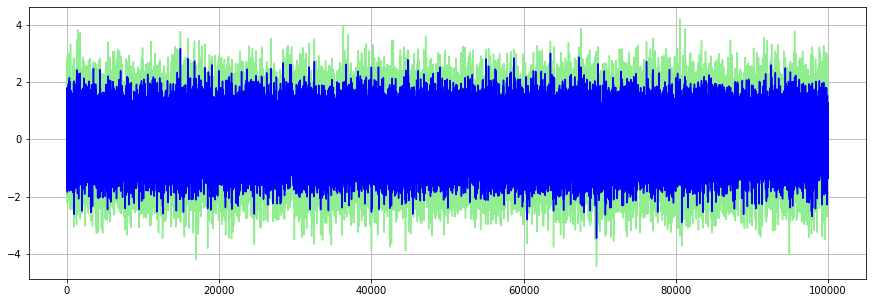

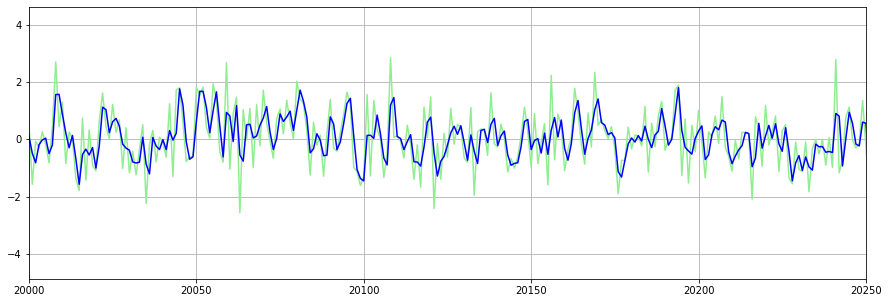

In [3]:
plt.figure(figsize=(15,5))
plt.plot(N_vector, X,color = "lightgreen")
plt.plot(N_vector, Y,color = "blue")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(N_vector, X,color = "lightgreen")
plt.plot(N_vector, Y,color = "blue")
plt.xlim(20000,20250)
plt.grid()
plt.show()

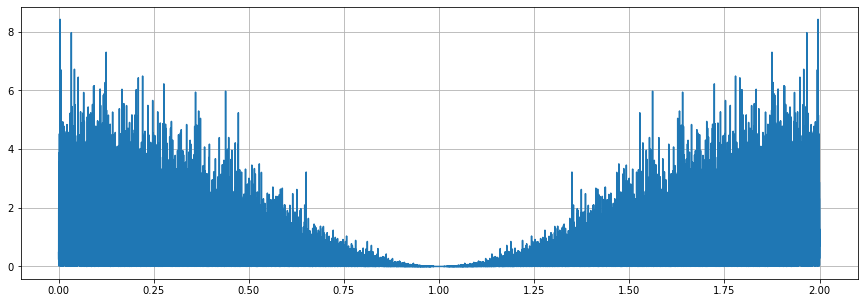

In [4]:
plt.figure(figsize=(15,5))
plt.plot(np.linspace(0,2,N), S_Y)
plt.grid()
plt.show()

## 4. Compare el periodograma original de $X$ y el de $Y$, estimado y teórico.


$S_X(\omega) = \sigma_X^2$


$S_y(\omega) = cos^2(\frac{\omega}{2})\sigma_X^2$

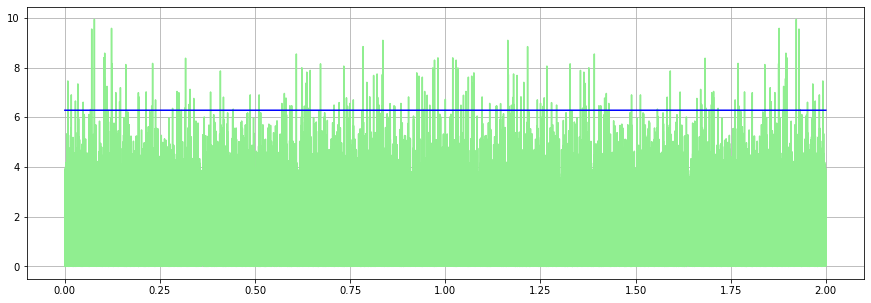

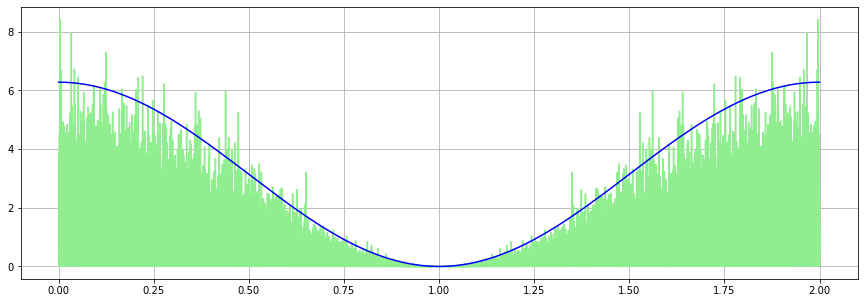

In [5]:
#  Comparison S_X, S_Y theoric and estimated
X = np.random.normal(0,1,N)

FFT_X = np.fft.fft(X)
S_X = ((np.abs(FFT_X))**2)/(N)

S_X_theoric = np.ones(N)
S_X_theoric = S_X_theoric*(2*np.pi)

S_Y_theoric = ((np.cos(freq/2))**2)*(2*np.pi)

plt.figure(figsize=(15,5))
plt.plot(np.linspace(0,2,N), S_X,color = 'lightgreen')
plt.plot(np.linspace(0,2,N), S_X_theoric,color = 'blue')
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(np.linspace(0,2,N), S_Y,color = 'lightgreen')
plt.plot(np.linspace(0,2,N), S_Y_theoric,color = 'blue')
plt.grid()
plt.show()

## 5. Demuestre la NO Consistencia del periodograma mediante simulaciones. Construya una gráfica de Varianza de estimación versus N, donde N es la longitud de la señal.

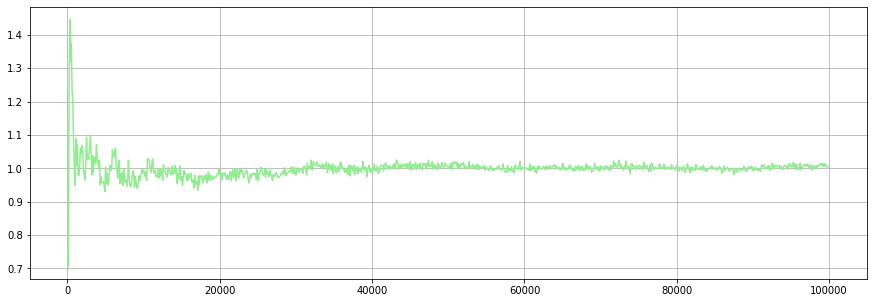

In [11]:
Nmax = 100001
Nmin = 100
Nstep = 100

S_X_var = np.zeros(len(N_vec))
for i in np.arange(Nmin, Nmax, Nstep):
  FFT_X = np.fft.fft(X[0:i])
  S_X = (np.abs(FFT_X)**2)/(i)
  S_X_var[int((i-Nmin)/Nstep)] = np.var(S_X)

plt.figure(figsize=(15,5))
plt.plot(N_vec, S_X_var,color = 'lightgreen')
plt.grid()
plt.show()

import scipy as sp
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(15,5))

varianzas = []
ini = 20
fin = 100

duracion = 1000 
for n,i in enumerate(range(ini, fin)):
  L = i * duracion
  X = np.random.randn(L)  # vector de entrada. Ruido blanco
  b = [0.5, 0.5]
  Y = sp.signal.lfilter(b, 1, X)  # Salida del promedio movil de dos muestras
  S_Y_hat = np.abs(np.fft.fft(X))**2 / X.size   # Estimacion de la PSD: periodograma
  varianzas.append(np.var(S_Y_hat))

plt.plot(range(ini, fin), varianzas)
plt.ylabel('Varianza de S_Y')
plt.xlabel('Longitud de la señal')



## 6. Implemente el promedio de periodogramas y confirme mediante simulación su consistencia. Construya una gráfica de Varianza de estimación versus N, donde N es la longitud de la señal.

Text(0.5, 0, 'Longitud de la señal')

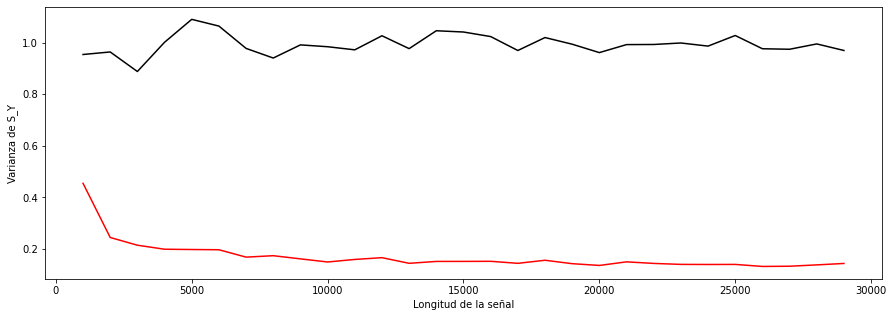

In [13]:
# Hecho por Paula
plt.figure(figsize=(15,5))

varianzas1 = []
varianzas2 = []
L = []
ini = 1
fin = 30

duracion = 1000 
for i in range(ini, fin):
  L.append(i * duracion)
  X = np.random.randn(L[-1])  # vector de entrada. Ruido blanco
  b = [0.5, 0.5]
  Y = sp.signal.lfilter(b, 1, X)  # Salida del promedio movil de dos muestras
  S_Y_hat = np.abs(np.fft.fft(X))**2 / X.size   # Estimacion de la PSD: periodograma normal
  varianzas1.append(np.var(S_Y_hat))
  # Estimacion del promedio de periodogramas
  S_y_ensamble = np.zeros((i,duracion))
  for l in range(i):
    y_l = Y[l*duracion : l*duracion + duracion];
    S_y_ensamble[l,:] = np.abs(np.fft.fft(y_l))**2 / duracion 
  promedio = np.mean(S_y_ensamble, axis = 0)
  varianzas2.append(np.var(promedio))

plt.plot(L, varianzas1,'k')
plt.plot(L, varianzas2,'r')
plt.ylabel('Varianza de S_Y')
plt.xlabel('Longitud de la señal')